In [1]:
from mvnc import mvncapi as mvnc
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [2]:
GRAPH = 'graph_caffe'
IMAGE = 'images/000456.jpg'
CLASSES = ('background',
           'aeroplane', 'bicycle', 'bird', 'boat',
           'bottle', 'bus', 'car', 'cat', 'chair',
           'cow', 'diningtable', 'dog', 'horse',
           'motorbike', 'person', 'pottedplant',
           'sheep', 'sofa', 'train', 'tvmonitor')

input_size = (300,300)


In [3]:
#discover our device 
devices = mvnc.EnumerateDevices()
# print(len(devices),devices)
device = mvnc.Device(devices[0])
device.OpenDevice()


In [4]:
#load graph onto the device
with open(GRAPH,'rb')as f:
    graph_file = f.read()
graph = device.AllocateGraph(graph_file)
graph

In [5]:
#image preprocessing
def preprocess(src):
    img = cv2.resize(src, input_size)
    img = img - 127.5
    img = img * 0.007843
    return img.astype(np.float16)


bus 1.0


<IPython.core.display.Javascript object>


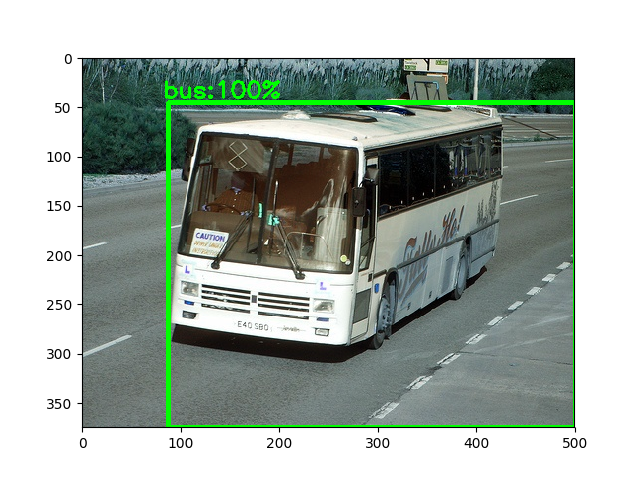

<function matplotlib.pyplot.show(*args, **kw)>

In [6]:
#graph => load the iamge to it,return a prediction
image = cv2.imread(IMAGE)
height,width = image.shape[:2]
# print(height,width)
# h_factor = height/input_size[0]
# w_factor = width/input_size[1]

image_pro = preprocess(image)
# print(image_pro.shape[:2])
graph.LoadTensor(image_pro,None)
output,_ = graph.GetResult()
# plt.imshow(image)
# plt.show
valid_boxes = int(output[0])
# print(output.shape)
for i in range(7,7*(1+valid_boxes),7):
    clss = CLASSES[int(output[i+1])]
    conf = output[i+2]
    x1 = max(0,int(output[i+3] * width))
    y1 = max(0,int(output[i+4] * height))
    x2 = max(width,int(output[i+5] * width))
    y2 = max(height,int(output[i+6] * height))

    label = '{}:{:.0f}%'.format(clss,conf*100)
    image = cv2.rectangle(image,(x1,y1),(x2,y2),(0,255,0),3)
    image = cv2.putText(image,label,(x1-5,y1-5),cv2.FONT_HERSHEY_SIMPLEX,0.8,(0,255,0),2)
#     image,label,(x1-5,y),cv2.FONT_HERSHEY_SIMPLEX,0.8,color,2
    print(clss,conf)
%matplotlib notebook
plt.imshow(image)
plt.show

In [7]:
#post processing
device.CloseDevice()